<a href="https://colab.research.google.com/github/yraj1996/netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [175]:
df = pd.read_csv('/content/drive/MyDrive/ALMA BETTER Capstone Project/Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [18]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [20]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [22]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


<Axes: >

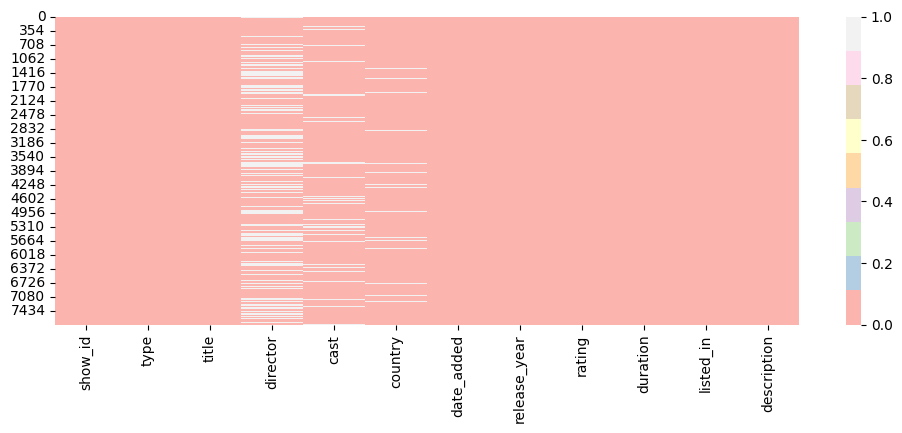

In [23]:
# Visualizing the missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(),cmap='Pastel1')

### What did you know about your dataset?

The given dataset is from the online streaming industry. Our task is to examine the dataset, build the clustering methods and content based recommendation system.
 
* There are 7787 rows and 12 columns in the dataset.
* The dataset does not contain any duplicate values.
* In the director, cast, country, date_added, and rating columns, there are missing values.
* Director column has more number of missing values that is 30.68% followed by cast (9.22%) and country( 6.51%).

I am going to handle the missing and null vlaues in Data wrangling section.

## ***2. Understanding Your Variables***

In [27]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
# Dataset Describe
df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* show_id : Unique ID for every Movie/Show
* type : Identifier - Movie/Show
* title : Title of the Movie/Show
* director : Director of the Movie/Show
* cast : Actors involved in the Movie/Show
* country : Country where the Movie/Show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Release year of the Movie/Show
* rating : TV Rating of the Movie/Show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description : The Summary description

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7770
No. of unique values in type is 2
No. of unique values in title is 7770
No. of unique values in director is 4048
No. of unique values in cast is 6818
No. of unique values in country is 681
No. of unique values in date_added is 1563
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7752


## 3. ***Data Wrangling***

### Data Wrangling Code

In [176]:
#HANDLING MISSING VALUES

df['director'].fillna('unknown', inplace=True)
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [178]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [179]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [180]:
# Converting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day"]= df["date_added"].dt.day
df["month"]= df["date_added"].dt.month
df["year"]= df["date_added"].dt.year

### What all manipulations have you done and insights you found?

Filled the nulled values in column name: Director  with 'unknown', Cast withy 'No cast' and null values in countries with mode of country column.
We drop the rows containing null values of column name - 'date_added' and 'rating' which has very less amount of null values and we can handle this by dropping those rows from dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

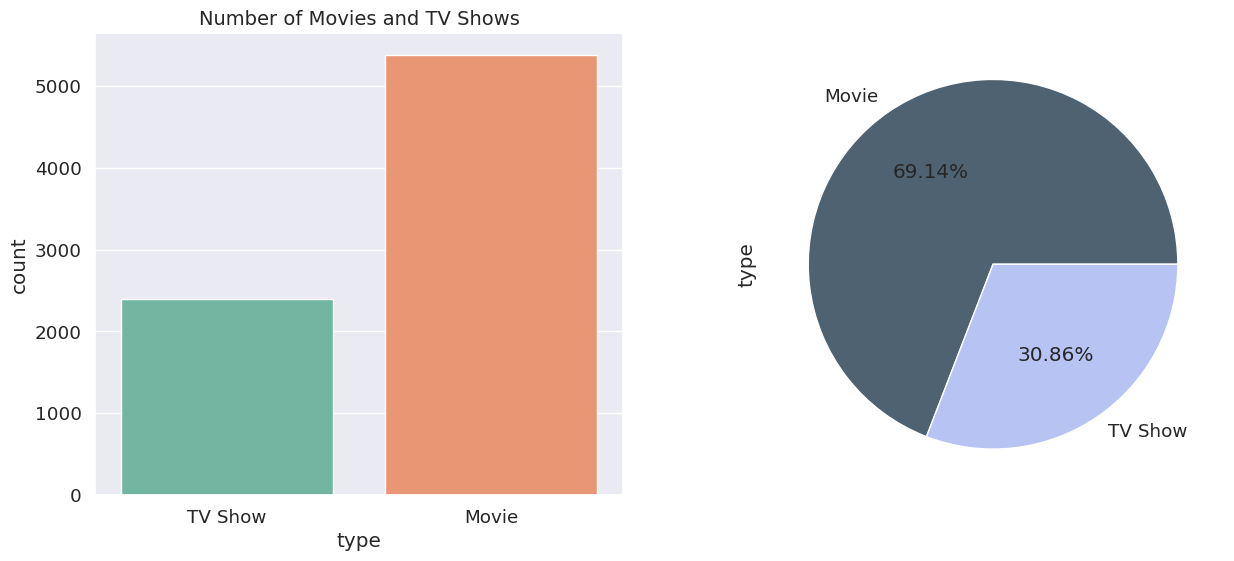

<Figure size 800x600 with 0 Axes>

In [181]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
count=sns.countplot(x='type', data=df, palette='Set2',ax=ax[0])
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),colors = ['#4F6272', '#B7C3F3'])
#labeling of values
count.set_title('Number of Movies and TV Shows', fontsize=14)
#Visualization of number of movies and tv shows
plt.show()

In [182]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

##### 1. Why did you pick the specific chart?

Count plot is a univariate plot that shows the comparison of different groups in categorical variables
countplot is a good choice for visualizing categorical data, it shows the number of movies and TV shows on Netflix.

A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion.


##### 2. What is/are the insight(s) found from the chart?

* The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.
* 69.14% are movies and 30.86% are tv-shows.
* majority of content type in netflix dataset is movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix needs to produce or aquire rights of more tv shows because from above data we can clearly see the dominance of movies contents on the Netflix. The people who loves the web series or tv shows might tend to look out for another options and hence it may leads to decrease in number of subscriber from the Netflix.

#### Chart - 2

In [211]:
# Chart - 2 visualization code
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [212]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].map(ratings)
     

In [213]:
# convert 'type' column to categorical data type
df['type'] = pd.Categorical(df['type'])

# create a new categorical column 'target_ages' with specified categories
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [214]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,target_ages
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,Teens


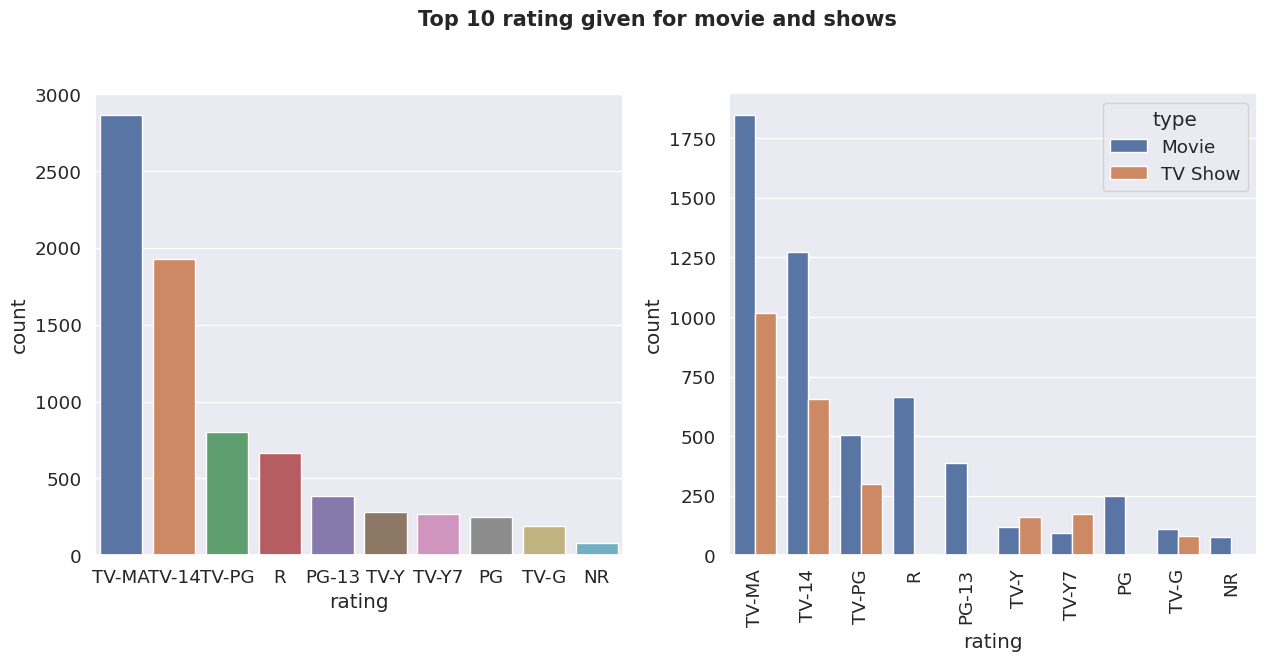

In [215]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='target_ages', ylabel='count'>

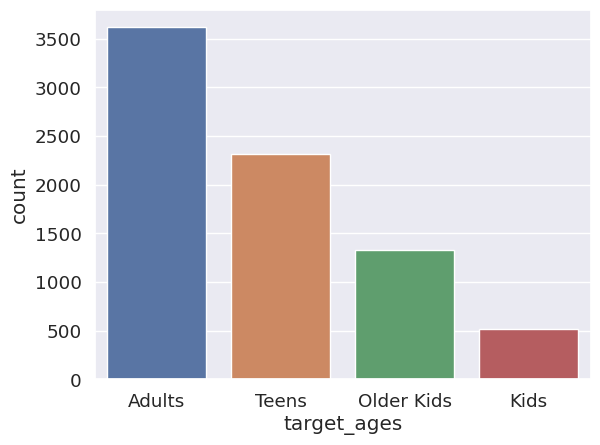

In [216]:
sns.countplot(x="target_ages", data=df, order=df['target_ages'].value_counts().index)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
Bar chart easily shows the count of movies belongs to  each ratings and we can also make comparison among subgroups or rating and target_ages.

##### 2. What is/are the insight(s) found from the chart?

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Teens".
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.
* High numbers of muovie are more suitabe for adults

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on Netflix's business strategy. Knowing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences.

Additionally, understanding the target age groups for different ratings can helps Netflix to create plans, marketing and promotional contents to specific audiences.

There is a potential negative impact as well. Some subscribers may be don't  like amount of mature content providing by the netflix, particularly if they are looking for family-friendly shows. This could lead to decreses in subscribers.

#### Chart - 3

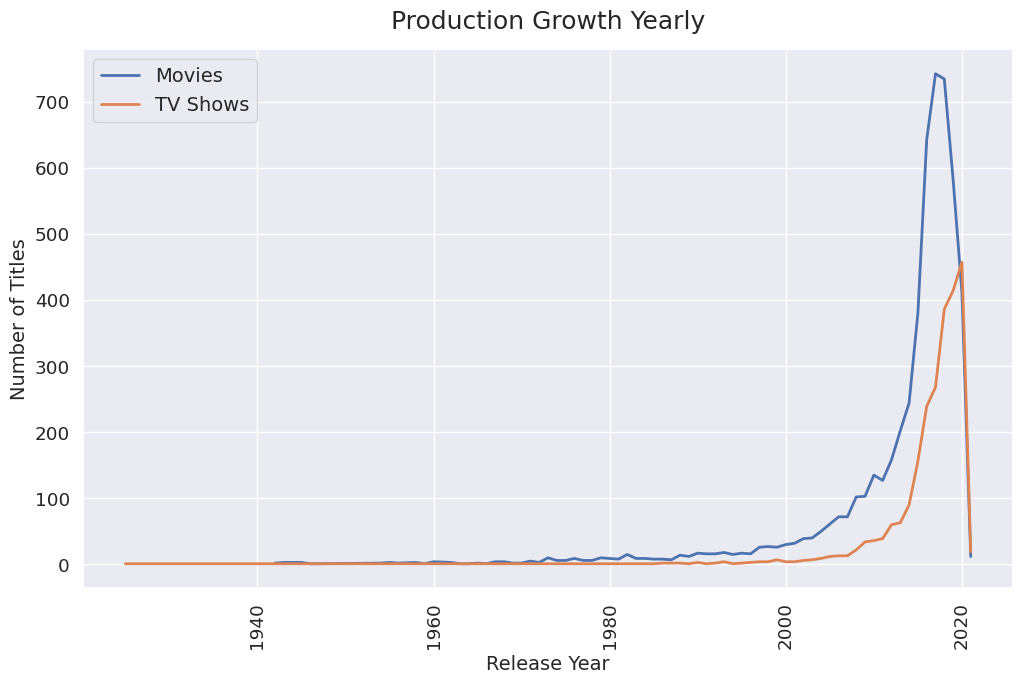

In [189]:
#Creating a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, label='Movies', linewidth=2 )
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, label='TV Shows', linewidth=2)

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.set_title('Production Growth Yearly', fontsize=18, pad=15)
plt.legend(fontsize=14)

plt.show()
     

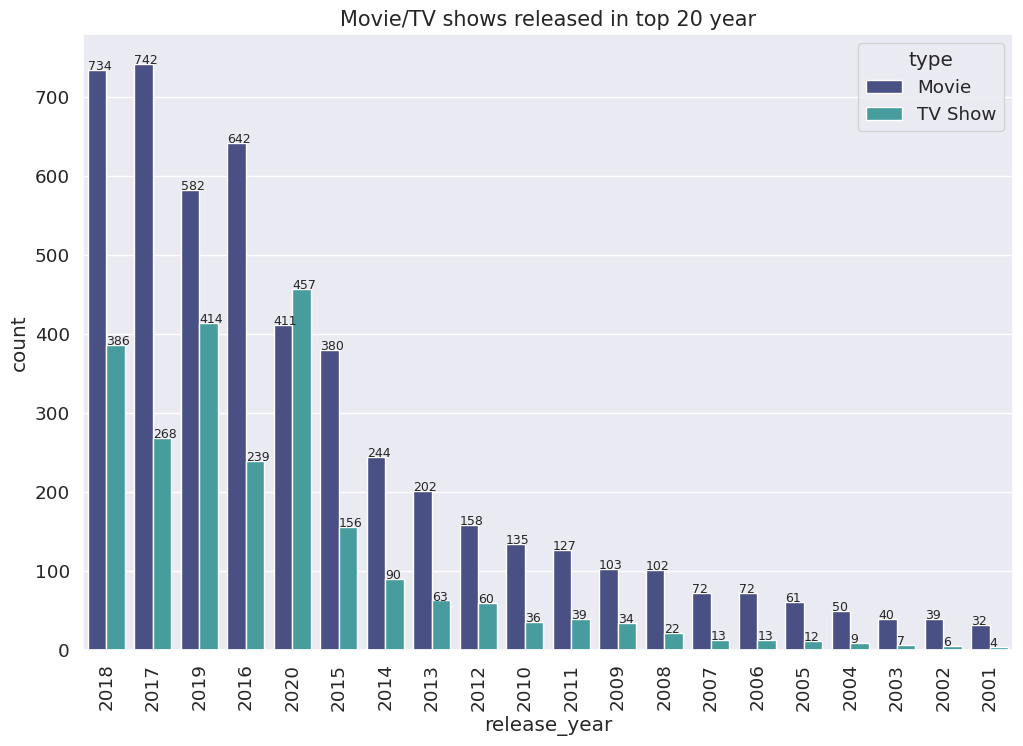

In [190]:
plt.figure(figsize=(12,8))
count = sns.countplot(x="release_year", palette='mako',hue='type', data=df, order=df['release_year'].value_counts().index[0:20])
count.set_title('Movie/TV shows released in top 20 year', size=15)
plt.xticks(rotation=90)
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()),size=9)
plt.show()

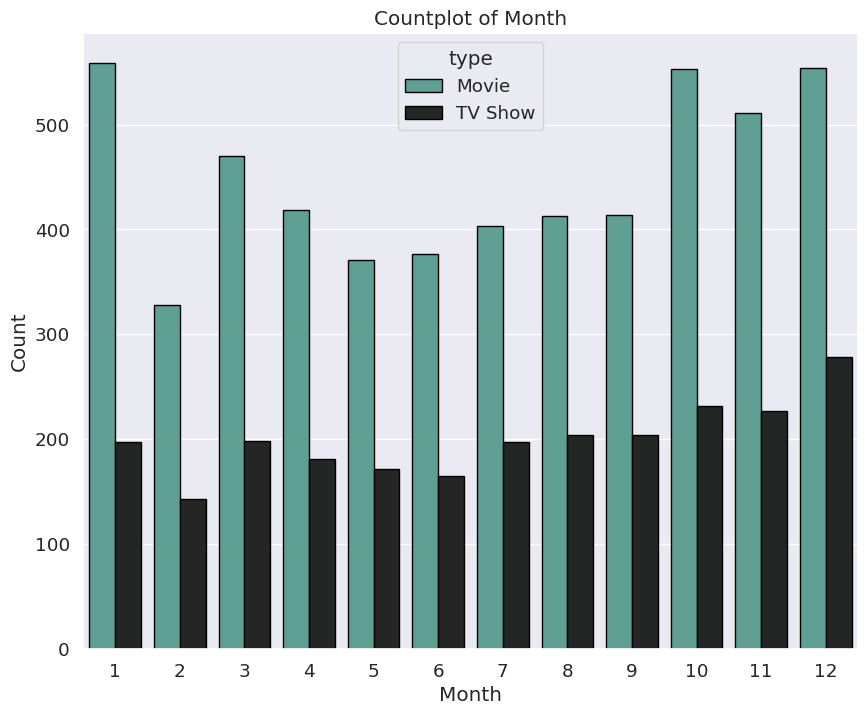

In [191]:
#visualization of month of movie release
plt.figure(figsize=(10, 8))
sns.countplot(x='month', data=df, palette="dark:#5A9_r",hue='type',edgecolor='black')
plt.title('Countplot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I choose line plot to display the number of movies and TV shows released per year from 2001 to 2020. This will allow  a clear comparison between the number of movies and TV shows released in each year and identify any trends or patterns in the data.

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.

##### 2. What is/are the insight(s) found from the chart?

* The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases.
* The growth rate of movie releases on Netflix is significantly faster than that of TV shows.
* Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.
* It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.
* Netflix adds the highest number of movies and TV shows during the period between October and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In recent years the amount of contents on the Netflix increasing rapidly.But more of the growth is in "Movies". 
This improvements are good for movie lovers and it can create a postive impact in a business.

On the other hand the Netflix needs to produce or aquire rights of more tv shows because from above data we can clearly see the dominance of movies contents on the Netflix. The people who loves the web series or tv shows might tend to look out for another options and hence it may leads to decrease in number of subscriber from the Netflix.

#### Chart - 4

In [209]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786


In [194]:
genres.value_counts()

genre                         count
Action & Adventure            721      1
Stand-Up Comedy & Talk Shows  52       1
Reality TV                    222      1
Romantic Movies               531      1
Romantic TV Shows             333      1
Sci-Fi & Fantasy              218      1
Science & Nature TV           85       1
Spanish-Language TV Shows     146      1
Sports Movies                 196      1
Stand-Up Comedy               329      1
TV Action & Adventure         149      1
Anime Features                57       1
TV Comedies                   517      1
TV Dramas                     703      1
TV Horror                     69       1
TV Mysteries                  90       1
TV Sci-Fi & Fantasy           75       1
TV Shows                      12       1
TV Thrillers                  50       1
Teen TV Shows                 60       1
Music & Musicals              321      1
Movies                        52       1
LGBTQ Movies                  90       1
Korean TV Shows      

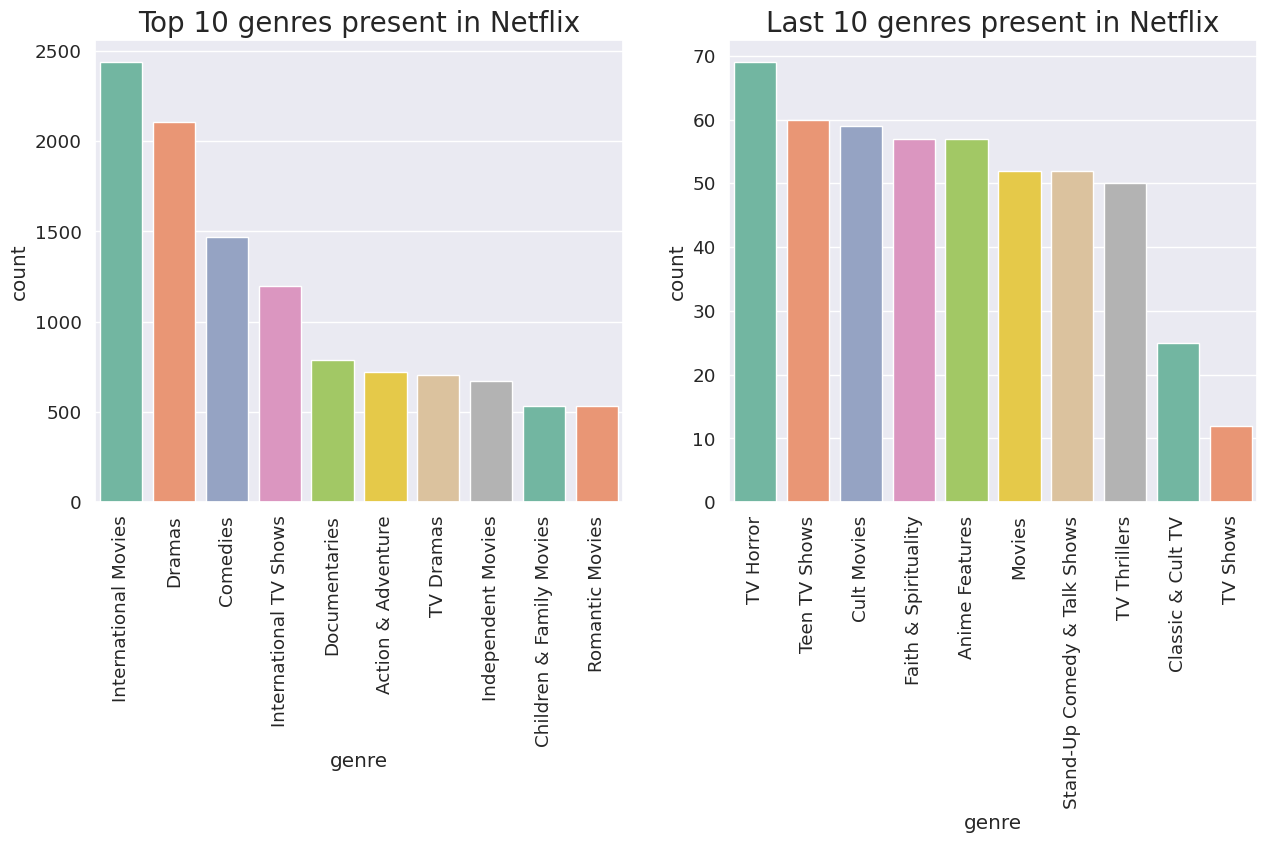

In [210]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count',palette='Set2', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count',palette='Set2', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this information could definitely have a positive business impact. By knowing which genres are most popular, Netflix can tailor their content offerings and marketing strategies to appeal to their target audience.



#### Chart - 5

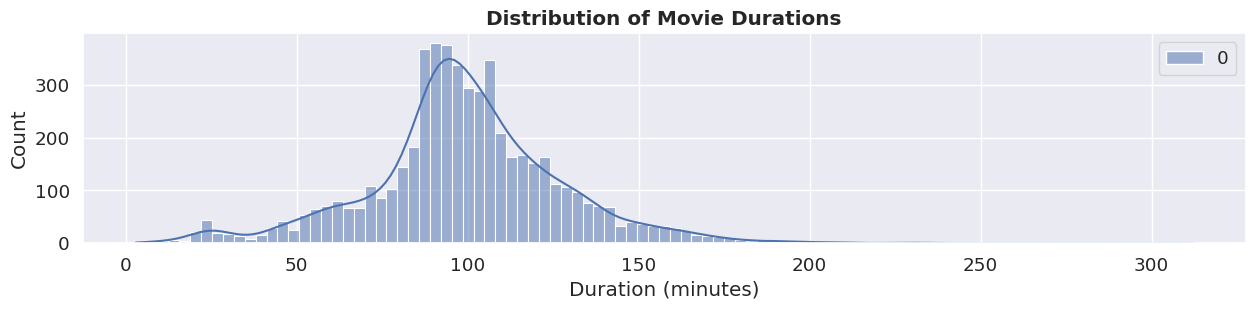

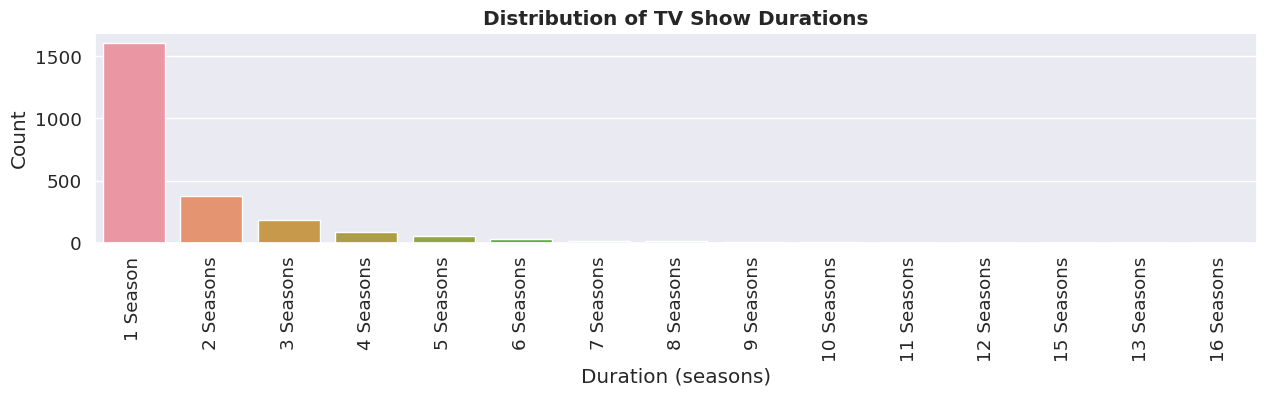

In [208]:
# Create a figure and set its size
plt.figure(figsize=(15, 6))
plt.subplot(2,1,2)
# Extract the duration values as integers using regex and plot a histogram
sns.histplot(movies['duration'].str.extract('(\d+)').astype(int), kde=True)
# Set the title of the plot
plt.title('Distribution of Movie Durations', fontweight='bold')
# Set the x-axis and y-axis label
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

plt.figure(figsize=(15, 6))
plt.subplot(2,1,2)
# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)
# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')
# Set the x-axis and y-axis label
plt.xlabel("Duration (seasons)")
plt.ylabel("Count")
plt.xticks(rotation=90)



plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation of data points organized into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.



##### 2. What is/are the insight(s) found from the chart?

* From the histogram plot of the movie durations, it was observed that the majority of the movies have a duration between 50 to 150 minutes.
* the TV shows have a large number of single-season shows, which indicates that most of the TV shows on Netflix are relatively new.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above graphs just shows the disturbution plots for movies and seasons in our dataset.

#### Chart - 6

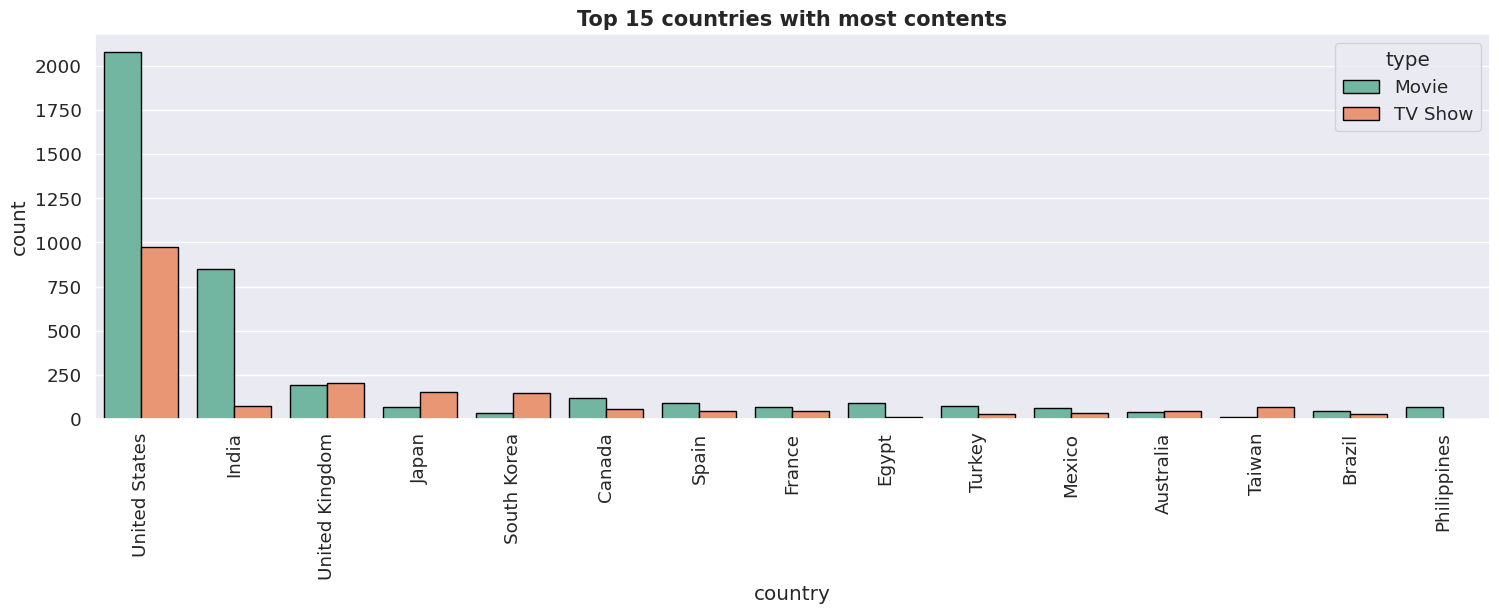

In [220]:
# create a figure with the desired size
plt.figure(figsize=(18,5))

# create a countplot with the 'country' column
# order the bars in descending order by value counts
# limit the plot to only show the top 15 countries
# hue the plot by content type ('TV Show' or 'Movie')
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15], hue=df['type'],palette='Set2',edgecolor='black')

# rotate the x-axis tick labels by 50 degrees for better visibility
plt.xticks(rotation=90)

# set the plot title and font size
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# show the plot
plt.show()

In [223]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'day',
       'month', 'year', 'target_ages'],
      dtype='object')

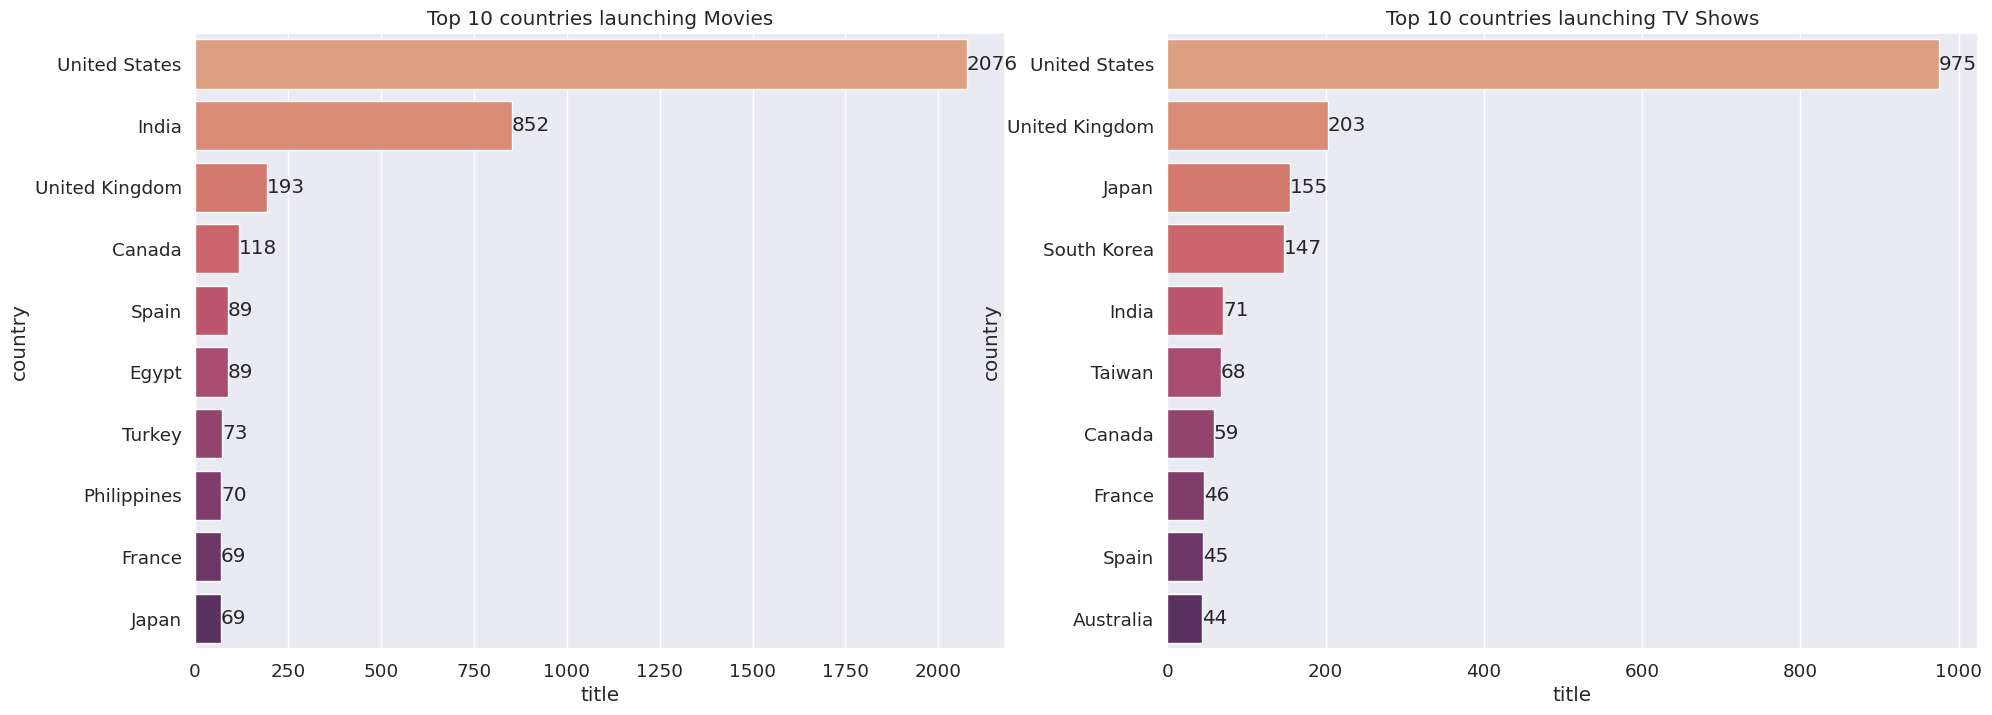

In [230]:
plt.figure(figsize=(23,8))
for i,j,k in ((movies, 'Movies',0),(tv_shows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "country",x = 'title', data = df_country, palette="flare")
  plt.title(f'Top 10 countries launching {j}')
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

* United States and India has most of contents on the Netflix.
* US and india release most of movies on Netflix.
* US and United Kingdom are the one who launched most number of TV shows.
* South Korea and Japan are the countries who launched more number of TV shows in comparison to movies launched by them.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be useful for Netflix in a number of ways. For example, they could use this information for their content recommendations to users based on their geographic location. They could also use this information to determine which types of content to focus on producing in the future.

However Netflix should focus on region or countries which are lacking contents. It may leads to decrease in number of local subscriber who wants to watch local contents.

#### Chart - 14 - Correlation Heatmap

In [233]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'day',
       'month', 'year', 'target_ages', 'count'],
      dtype='object')

In [235]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


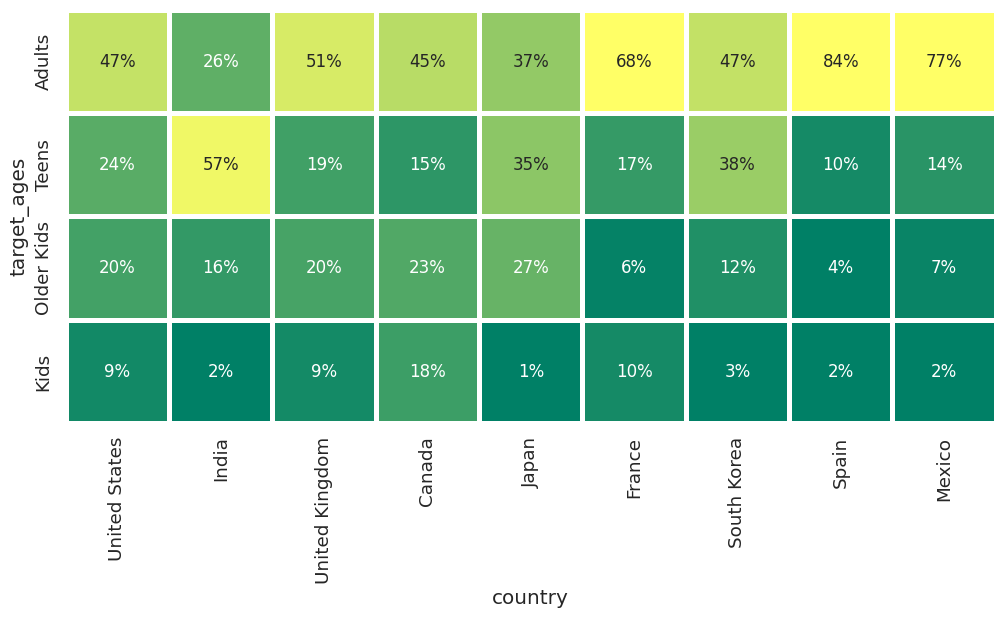

In [240]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="summer",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

US produced equal amount of movies as India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis (H0)**: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.
* **Alternative hypothesis (H1)**: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.

#### 2. Perform an appropriate statistical test.

In [252]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
# Filter movies only

movies = df[df.type == 'Movie']

# Filter by country
us_movies = movies[movies.country == 'United States']
india_movies = movies[movies.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movies['release_year'], india_movies['release_year'], equal_var=False)

# Print the results
print('p-value: ', p)
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.")
else:
    print("Fail to reject null hypothesis. The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.")

p-value:  0.0002764286534204901
Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample t-test to obtain the p-value. Specifically, I used the ttest_ind function from the scipy.stats module to perform the t-test.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it's appropriate for comparing the means of two independent samples.We have two independent samples of movies on Netflix in the United States and India, and we want to test whether the mean number of movies in the United States is significantly different from the mean number of movies in India.

### Hypothetical Statement - 2

The average duration of movies added in the year 2020 on Netflix is simillar of movies added in the year 2021.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis(H0)**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2018.

* **Alternative Hypothesis(H1)**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.

#### 2. Perform an appropriate statistical test.

In [270]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2018
movies_2020 = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
movies_2018 = df[(df['type'] == 'Movie') & (df['release_year'] == 2018)]

# Perform two-sample t-test
t, p = ttest_ind(movies_2020.count(), 
                 movies_2018.count(), equal_var=False)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of Movies added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of Moviess added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2018.')


p-value:  0.0
Reject null hypothesis. 
The average duration of Movies added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (movies added in 2020 vs movies added in 2018) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of movies added in 2020 and 2018 would have the exact same variance.

### Hypothetical Statement - 3

The number of movies and TV shows on Netflix are simillar.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis(H0)**: The number of movies and TV shows on Netflix is not significantly different.

* **Alternative hypothesis(H1)**: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [273]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows
from statsmodels.stats.proportion import proportions_ztest
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)

if p < 0.05:
    print('Reject null hypothesis. \nThe number of movies on Netflix is significantly greater than the number of TV shows.')
else:
    print('Failed to reject null hypothesis. \nThe number of movies and TV shows on Netflix is not significantly different.')

Number of movies: 5372
Number of TV shows: 2398
z-statistic: 47.71395895355864
p-value: 0.0
Reject null hypothesis. 
The number of movies on Netflix is significantly greater than the number of TV shows.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***